In [25]:
import pickle, os, numpy as np
from matplotlib import pyplot as plt

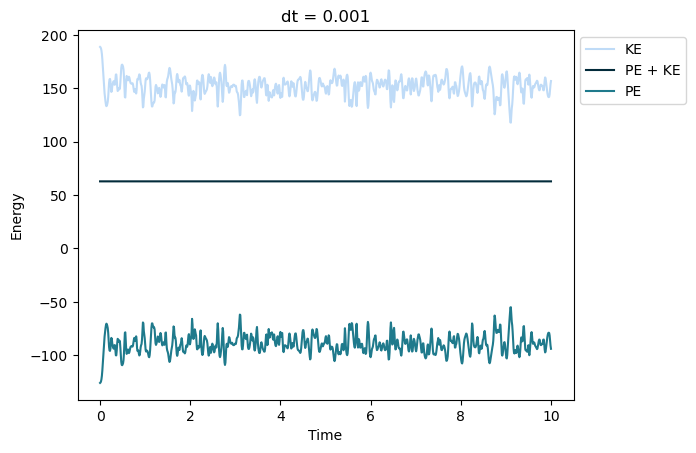

In [28]:
colors = ['#022b3a', '#1f7a8c', '#bfdbf7']

job_dir = f'./runs/N=64_totaltime=10_dt=10e-4'

with open(os.path.join(job_dir, 'data.pkl'), 'rb') as f:
    data = pickle.load(f)
time = data['time']
system_energy = data['system_energy']
system_pe = data['system_pe']
system_ke = data['system_ke']

plt.plot(time, system_ke, label = 'KE', color = colors[2])
plt.plot(time, system_energy, label = f'PE + KE', color = colors[0])
plt.plot(time, system_pe, label = 'PE', color = colors[1])
    

plt.title('dt = 0.001')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

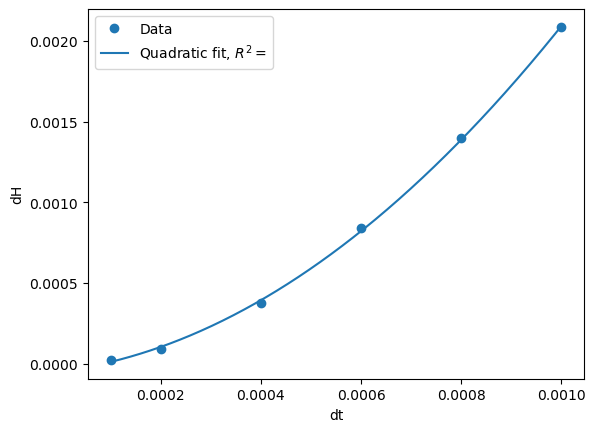

In [60]:
dH = []
dt = np.array([0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.0010])
for i in range(6):
    if i == 0:
        job_dir = f'./runs/N=64_totaltime=10_dt=1e-4'
    else:
        job_dir = f'./runs/N=64_totaltime=10_dt={i*2}e-4'
        
    with open(os.path.join(job_dir, 'data.pkl'), 'rb') as f:
        data = pickle.load(f)
    time = data['time']
    system_energy = data['system_energy']
    dH.append(system_energy.std())

dH = np.array(dH)
plt.plot(dt, dH, 'o', label='Data')
    
# Fit a quadratic polynomial: y = ax^2 + bx + c
coeffs = np.polyfit(dt, dH, deg=2)
poly = np.poly1d(coeffs)

dt_fit = np.linspace(dt.min(), dt.max(), 500)
dH_fit = poly(dt_fit)

# Plot the quadratic fit
plt.plot(dt_fit, dH_fit, '-', label=r'Quadratic fit, $R^2=$', color = 'tab:blue')

plt.xlabel('dt')
plt.ylabel('dH')
plt.legend()
plt.show()

In [50]:
dH

array([20.85226588, 20.85226588, 20.85226588, 20.85226588, 20.85226588,
       20.85226588])

In [ ]:
colors = ['#f18f01', '#048ba8', '#2e4057']

dH = []
for i, dt in enumerate([1, 2, 3, 4, 5]):
    job_dir = f'./runs/N=64_totaltime=10_dt=1e-{dt}'
    with open(os.path.join(job_dir, 'data.pkl'), 'rb') as f:
        data = pickle.load(f)
    system_energy = data['system_energy']
    dH.append(system_energy.std())

log_dt = [-1, -2, -3, -4, -5]
log_dH = np.log10(dH)

plt.plot(time, system_energy, label = f'dt=1e-{dt}', color = colors[i])
    
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

